In [73]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display 


# Pretty display for notebooks
%matplotlib inline
dataset = pd.read_csv("datasets/dataset_clean.csv.gz", compression='gzip')
dataset = dataset.drop(['Unnamed: 0'], axis = 1)
dataset['RIESGO_VIDA'] = np.where(dataset['RIESGO_VIDA'] == 'si', 1,0)
display(dataset.head(n = 5))



,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_DPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,bogota d.c.,bogotá,juridica,escrito,pqr,cerrado,peticion directa,reclamo,0,trim i
1,nariño,de 0 a 5 años,ninguno,hombre,no aplica,puerres,otro,no aplica,subsidiado,natural,...,nariño,puerres,natural,telefonico,pqr,cerrado,0,reclamo,0,trim i
2,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,...,valle,cali,natural,telefonico,pqr,cerrado,0,reclamo,0,trim i
3,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,...,huila,neiva,natural,personalizado,pqr,cerrado,0,reclamo,0,trim i
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,risaralda,dosquebradas,natural,personalizado,pqr,pendiente (avance),0,reclamo,1,trim i


In [74]:
display("".join(re.findall("[a-zA-Z]+", str("bogota d.c"))))

'bogotadc'

## Encode categorical values

In [75]:
import re
import time

def encodeValue(value):
    value = "".join(re.findall("[a-zA-Z]+", str(value)))
    value = "null" if(value == '') else value
    value = float(int(value, 36)) #log doesn't handle large int
    return np.log(value)

labels = dataset[['RIESGO_VIDA']]
features_raw = dataset.drop(['RIESGO_VIDA', 'PQR_ESTADO'], axis = 1)

start_time = time.time()   
features_raw = features_raw.applymap(lambda s: encodeValue(s))
display(features_raw.head(n = 5))

print("--- %s seconds ---" % (time.time() - start_time))




,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PATOLOGIA_TIPO,PET_COD_DEPTO,PET_DPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_TIPOATENCION,PQR_TIPOPETICION,TRIM
0,27.542472,20.512613,24.658884,17.462953,28.249049,16.791915,13.962485,28.249049,35.613518,24.649602,...,261.262527,13.92234,27.542472,16.791915,28.073066,24.194904,10.415203,53.404473,24.811606,17.727388
1,17.482487,20.512613,24.658884,20.790249,28.249049,24.753220,13.962485,28.249049,35.613518,24.649602,...,261.262527,13.92234,17.482487,24.753220,24.649602,35.632849,10.415203,13.922340,24.811606,17.727388
2,17.777516,20.512613,35.598018,20.790249,28.249049,13.259698,23.836071,28.249049,41.959133,24.649602,...,261.262527,13.92234,17.777516,13.259698,24.649602,35.632849,10.415203,13.922340,24.811606,17.727388
3,17.215949,20.512613,82.260162,20.790249,28.249049,17.486959,17.564421,28.249049,41.959133,24.649602,...,261.262527,13.92234,17.215949,17.486959,24.649602,46.237383,10.415203,13.922340,24.811606,17.727388
4,31.983131,20.512613,24.658884,20.790249,28.249049,42.035290,17.564421,110.740724,41.959133,24.649602,...,31.356597,13.92234,31.983131,42.035290,24.649602,46.237383,10.415203,13.922340,24.811606,17.727388


--- 386.611823797 seconds ---


## Shuffle and Split Data

In [76]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'labels' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    labels, 
                                                    test_size = 0.20, 
                                                    random_state = 10)

# Show the results of the split
print "features_final set has {} samples.".format(features_raw.shape[0])
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

features_final set has 2130783 samples.
Training set has 1704626 samples.
Testing set has 426157 samples.


### Creating a Training and Predicting Pipeline

In [77]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''

tp = float(np.sum(labels['RIESGO_VIDA']))
fp = float(labels['RIESGO_VIDA'].count() - tp)
tn = 0
fn = 0

# TODO: Calculate accuracy, precision and recall
accuracy = (tp + tn)/labels['RIESGO_VIDA'].count()
recall = tp / (tp + fn)
precision = tp / (tp + fp)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
beta = 2
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.1355, F-score: 0.4395]


In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time.time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time.time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time.time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:1000])
    end = time.time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:1000], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] =  accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    b=0.5
    results['f_train'] = fbeta_score(y_train[:1000], predictions_train, b)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] =  fbeta_score(y_test, predictions_test, b)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results
  

AdaBoostClassifier trained on 17046 samples.
AdaBoostClassifier trained on 170462 samples.
AdaBoostClassifier trained on 1704626 samples.


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier trained on 17046 samples.
RandomForestClassifier trained on 170462 samples.
RandomForestClassifier trained on 1704626 samples.
SGDClassifier trained on 17046 samples.
SGDClassifier trained on 170462 samples.
SGDClassifier trained on 1704626 samples.


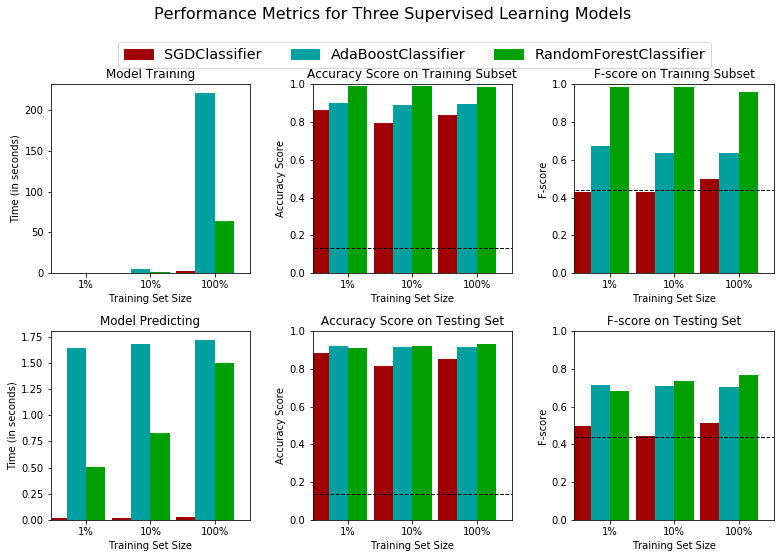

In [79]:
import visuals as vs
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

# TODO: Initialize the three models
clf_A = AdaBoostClassifier(random_state = 300)
clf_B = RandomForestClassifier(random_state = 300)
clf_C = SGDClassifier(random_state = 300)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = int(samples_100*0.1)
samples_1 = int(samples_10*0.1)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [80]:
print(results)

{'SGDClassifier': {0: {'pred_time': 0.017503023147583008, 'f_test': 0.499027890952238, 'train_time': 0.028990983963012695, 'acc_train': 0.863, 'acc_test': 0.8815342702337402, 'f_train': 0.4285714285714286}, 1: {'pred_time': 0.0195159912109375, 'f_test': 0.4457849081166053, 'train_time': 0.23533892631530762, 'acc_train': 0.796, 'acc_test': 0.815894142299669, 'f_train': 0.4284525790349417}, 2: {'pred_time': 0.02571892738342285, 'f_test': 0.5126174388750455, 'train_time': 3.0690438747406006, 'acc_train': 0.836, 'acc_test': 0.8534577632187199, 'f_train': 0.49718574108818014}}, 'AdaBoostClassifier': {0: {'pred_time': 1.6440138816833496, 'f_test': 0.7119167194088493, 'train_time': 0.5813641548156738, 'acc_train': 0.903, 'acc_test': 0.9179269611903594, 'f_train': 0.673374613003096}, 1: {'pred_time': 1.6834919452667236, 'f_test': 0.7074534161490684, 'train_time': 5.349287033081055, 'acc_train': 0.893, 'acc_test': 0.9161435808868562, 'f_train': 0.6346749226006192}, 2: {'pred_time': 1.7217431068